# Estacionariedade de séries temporais

Verificaremos se duas séries temporais são estacionárias ou não realizando os testes ADF e KPSS

* Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Lendo CSVs das séries temporais

In [2]:
temperatura = pd.read_csv('daily-min-temperatures.csv')

In [3]:
passageiros = pd.read_csv('Passageiros.csv')

* Exibindo cinco primeiras linhas

In [4]:
temperatura.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
passageiros.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


* Convertendo datas para datetime

In [6]:
passageiros['Datetime'] = pd.to_datetime(passageiros['Datetime'])

In [7]:
temperatura['Date'] = pd.to_datetime(temperatura['Date'])

* Definindo datas como índice

In [8]:
temperatura = temperatura.set_index('Date')

In [9]:
passageiros = passageiros.set_index('Datetime')
passageiros = passageiros.drop('ID',axis=1)
passageiros =  passageiros.resample('D').sum()
passageiros = passageiros.dropna()

* Graficando séries temporais

Text(0, 0.5, 'Passageiros')

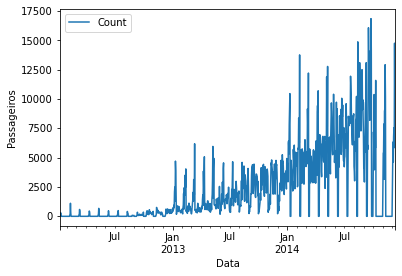

In [10]:
passageiros.plot()
plt.xlabel('Data')
plt.ylabel('Passageiros')

Text(0, 0.5, 'Temperatura')

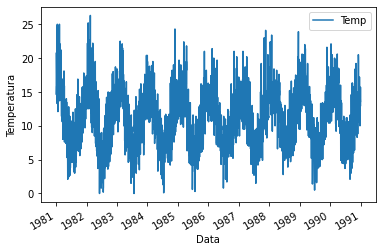

In [11]:
temperatura.plot()
plt.xlabel('Data')
plt.ylabel('Temperatura')

* Teste ADF

In [12]:
from statsmodels.tsa.stattools import adfuller

* Passageiros

In [13]:
resultado_passageiros = adfuller(passageiros, autolag='AIC')
print('Estatística ADF: {:0.2f}'.format(resultado_passageiros[0]))
print('Número de atrasos: {}'.format(resultado_passageiros[2]))
print('Valor p: {:0.3f}'.format(resultado_passageiros[1]))
for key, value in resultado_passageiros[4].items():
    print('Valores críticos:')
    print("{}, {:0.2f}".format(key,value))

Estatística ADF: -2.90
Número de atrasos: 14
Valor p: 0.045
Valores críticos:
1%, -3.44
Valores críticos:
5%, -2.86
Valores críticos:
10%, -2.57


Série temporal estacionária 

* Temperatura

In [14]:
resultado_temperatura = adfuller(temperatura, autolag='AIC')
print('Estatística ADF: {:0.2f}'.format(resultado_temperatura[0]))
print('Número de atrasos: {}'.format(resultado_temperatura[2]))
print('Valor p: {:0.1e}'.format(resultado_temperatura[1]))
for key, value in resultado_temperatura[4].items():
    print('Valores críticos:')
    print("{}, {:0.2f}".format(key,value))

Estatística ADF: -4.44
Número de atrasos: 20
Valor p: 2.5e-04
Valores críticos:
1%, -3.43
Valores críticos:
5%, -2.86
Valores críticos:
10%, -2.57


Série temporal estacionária

* Teste KPSS

In [15]:
from statsmodels.tsa.stattools import kpss

* Passageiros

In [16]:
estatistica_pas, valor_p_pas, n_atrasos_pas, valores_criticos_pas = kpss(passageiros)

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [17]:
print('KPSS Statistic: {:0.2f}'.format(estatistica_pas))
print('Valor p: {:0.2f}'.format(valor_p_pas))
print('Número atrasos: {}'.format(n_atrasos_pas))
print('Valores críticos:')
for key, value in valores_criticos_pas.items():
    print("{} : {:0.2f}".format(key,value))

KPSS Statistic: 3.64
Valor p: 0.01
Número atrasos: 22
Valores críticos:
10% : 0.35
5% : 0.46
2.5% : 0.57
1% : 0.74


* Temperatura

In [18]:
estatistica_temp, valor_p_temp, n_atrasos_temp, valores_criticos_temp = kpss(temperatura)

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [19]:
print('KPSS Statistic: {:0.2f}'.format(estatistica_temp))
print('Valor p: {:0.2f}'.format(valor_p_temp))
print('Número atrasos: {}'.format(n_atrasos_temp))
print('Valores críticos:')
for key, value in valores_criticos_temp.items():
    print("{} : {:0.2f}".format(key,value))

KPSS Statistic: 0.07
Valor p: 0.10
Número atrasos: 30
Valores críticos:
10% : 0.35
5% : 0.46
2.5% : 0.57
1% : 0.74
